In [25]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy.optimize as opt
from scipy.special import factorial
import math
# import csv
from matplotlib import rc, rcParams

In [26]:
plt.rcParams['figure.figsize'] = [6.4, 4.8]  # Matplotlib's default figure size
plt.rcParams['figure.autolayout'] = True  # Ensures proper spacing
# Set equal aspect ratio and axis limits in the plotting code instead of rcParams

plt.ioff()


In [27]:
###
"""
with open('data/Real/142_4/142-4mA_20k_10s_3u_10-29.txt', mode ='r') as file: # "ElsieWiddowsonFileC051.txt"
    lines = file.readlines()
    # Convert each line into list of floats by splitting on tabs
    data = [[float(val) for val in line.strip().split('\t')] for line in lines]
    # Transpose to get columns
    data = list(map(list, zip(*data)))

# Create resampled data taking every 100th point
data_resampled = [column[::100] for column in data]

print(data_resampled)
plt.plot(data_resampled[2], data_resampled[3])  # First two columns are x,y coordinates
plt.show()

lines = np.array(data)

avgx = sum(lines[0] / len(lines[0]))
avgy = sum(lines[1] / len(lines[1]))
dists = np.sqrt((lines[0] - avgx) ** 2 + (lines[1] - avgy) ** 2)
### 
"""


'\nwith open(\'data/Real/142_4/142-4mA_20k_10s_3u_10-29.txt\', mode =\'r\') as file: # "ElsieWiddowsonFileC051.txt"\n    lines = file.readlines()\n    # Convert each line into list of floats by splitting on tabs\n    data = [[float(val) for val in line.strip().split(\'\t\')] for line in lines]\n    # Transpose to get columns\n    data = list(map(list, zip(*data)))\n\n# Create resampled data taking every 100th point\ndata_resampled = [column[::100] for column in data]\n\nprint(data_resampled)\nplt.plot(data_resampled[2], data_resampled[3])  # First two columns are x,y coordinates\nplt.show()\n\nlines = np.array(data)\n\navgx = sum(lines[0] / len(lines[0]))\navgy = sum(lines[1] / len(lines[1]))\ndists = np.sqrt((lines[0] - avgx) ** 2 + (lines[1] - avgy) ** 2)\n### \n'

Processing data/Real/xyscan\100-6mA_xx.txt:
[[0.0163202, 0.0153345, 0.0156631, 0.0163202, 0.0156631, 0.0159916, 0.0156631, 0.0153345, 0.0156631, 0.0159916, 0.0163202, 0.0156631, 0.0163202, 0.0163202, 0.0159916, 0.0163202, 0.0166487, 0.0159916, 0.0159916, 0.0159916, 0.0166487, 0.0153345, 0.0163202, 0.0159916, 0.0159916, 0.0159916, 0.0159916, 0.0163202, 0.0163202, 0.0163202, 0.0159916, 0.0156631, 0.0156631, 0.0159916, 0.0156631, 0.0163202, 0.0153345, 0.0159916, 0.0159916, 0.0159916, 0.0159916, 0.0159916, 0.0159916, 0.0159916, 0.0153345, 0.0163202, 0.0166487, 0.0153345, 0.0159916, 0.0153345, 0.0163202, 0.0156631, 0.0163202, 0.0156631, 0.0156631, 0.0156631, 0.0166487, 0.0159916, 0.0163202, 0.0163202, 0.0159916, 0.0159916, 0.0163202, 0.0159916, 0.0159916, 0.0166487, 0.0159916, 0.0163202, 0.0166487, 0.0163202, 0.0159916, 0.0163202, 0.0163202, 0.0166487, 0.0159916, 0.0156631, 0.0163202, 0.0163202, 0.0163202, 0.0163202, 0.0159916, 0.0163202, 0.0156631, 0.0163202, 0.0163202, 0.0159916, 0.016648

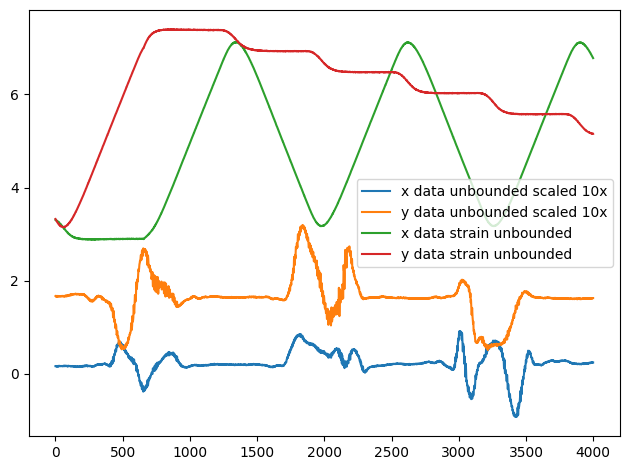

[ 0.00053352 -0.05404871] [[ 6.40577706e-09 -1.56941539e-07]
 [-1.56941539e-07  5.17907080e-06]]


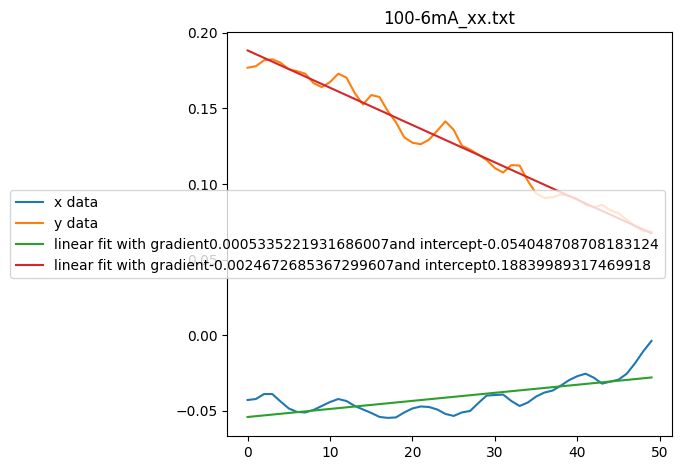

In [28]:
import os
import glob

# Get all txt files in xyscan directory, excluding Settings files
# specify if we want x or y based on exclusions
currents = [100]#, [100, 142, 193, 292, 392, 493]  # List of currents to process, 
xyscan_files = []
# Check x first
for current in currents:
    xyscan_files.extend([f for f in glob.glob(f'data/Real/xyscan/{current}-*.txt')
                        if not (f.endswith('Settingsx.txt') or f.endswith('Settingsy.txt') or 
                               f.endswith('SettingsX.txt') or f.endswith('SettingsY.txt') or f.endswith('yy.txt'))])

for filename in xyscan_files:
    with open(filename, mode='r') as file:
        lines = file.readlines()
        # Convert each line into list of floats by splitting on tabs
        data = [[float(val) for val in line.strip().split('\t')] for line in lines]
        # Transpose to get columns 
        data = list(map(list, zip(*data)))
    data_resampled = [column[::50] for column in data]

    print(f"Processing {filename}:")
    print(data)


    def linear_fit(x, m, c):
        return m*np.array(x) + c
    
    # Pick out three areas for fitting
    # Range 1 is 700:875 where we want data from [0] through [3]

    plt.plot(np.arange(len(data_resampled[0])), np.array(data_resampled[0])*10, label = 'x data unbounded scaled 10x')  # First two columns are x,y coordinates
    plt.plot(np.arange(len(data_resampled[1])), np.array(data_resampled[1])*10, label = 'y data unbounded scaled 10x')  # First two columns are x,y coordinates
    plt.plot(np.arange(len(data_resampled[2])), np.array(data_resampled[2]), label = 'x data strain unbounded')  # First two columns are x,y coordinates
    plt.plot(np.arange(len(data_resampled[3])), np.array(data_resampled[3]), label = 'y data strain unbounded')  # First two columns are x,y coordinates
    plt.legend()
    plt.show()
    idx1 = 3075
    idx2 = 3125
    range1x = data_resampled[0][idx1:idx2]
    range1y = data_resampled[1][idx1:idx2]
    range1xstrain = data_resampled[2][idx1:idx2]
    range1ysttrain = data_resampled[3][idx1:idx2]
    plt.plot(np.arange(len(range1x)), range1x, label = 'x data')  # First two columns are x,y coordinates
    plt.plot(np.arange(len(range1y)), range1y, label = 'y data')  # First two columns are x,y coordinates
    #plt.plot(np.arange(len(range1xstrain)), range1xstrain, label = 'x data strain')  # First two columns are x,y coordinates
    #plt.plot(np.arange(len(range1ysttrain)), range1ysttrain, label = 'y data strain')
    plt.title(os.path.basename(filename))
    # DO linear fit on subset 75 to 125
    range1xsubset = range1x
    range1ysubset = range1y
    popty, pcovy = opt.curve_fit(linear_fit, np.arange(len(range1ysubset)), range1ysubset, p0=(-0.5, 1))
    popt, pcov = opt.curve_fit(linear_fit, np.arange(len(range1xsubset)), range1xsubset, p0=(-0.5, 1))
    print(popt, pcov)
    plt.plot(np.arange(len(range1x)), linear_fit(np.arange(len(range1x)), *popt), label = 'linear fit with gradient' + str(popt[0]) + 'and intercept' + str(popt[1]))
    plt.plot(np.arange(len(range1y)), linear_fit(np.arange(len(range1y)), *popty), label = 'linear fit with gradient' + str(popty[0]) + 'and intercept' + str(popty[1]))

    plt.legend()
    plt.show()






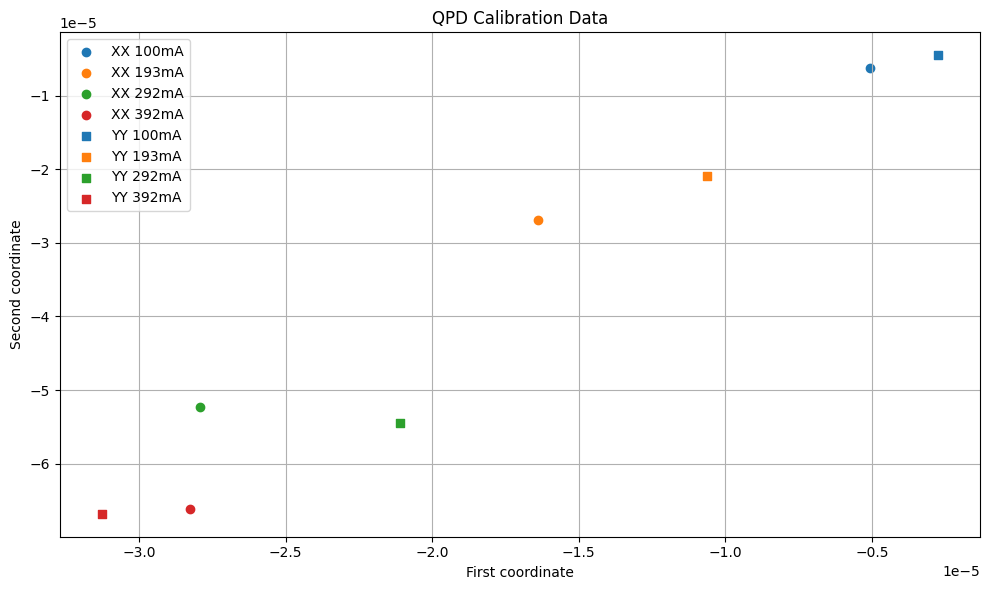

XX tan(theta) values by power (mA):
100    1.219176
193    1.641989
292    1.873534
392    2.342482
dtype: float64

YY tan(theta) values by power (mA):
100    1.637739
193    1.970124
292    2.585245
392    2.136274
dtype: float64

XX theta values (degrees) by power (mA):
100    50.640492
193    58.657856
292    61.908904
392    66.882476
dtype: float64

YY theta values (degrees) by power (mA):
100    58.591855
193    63.088457
292    68.853008
392    64.915486
dtype: float64


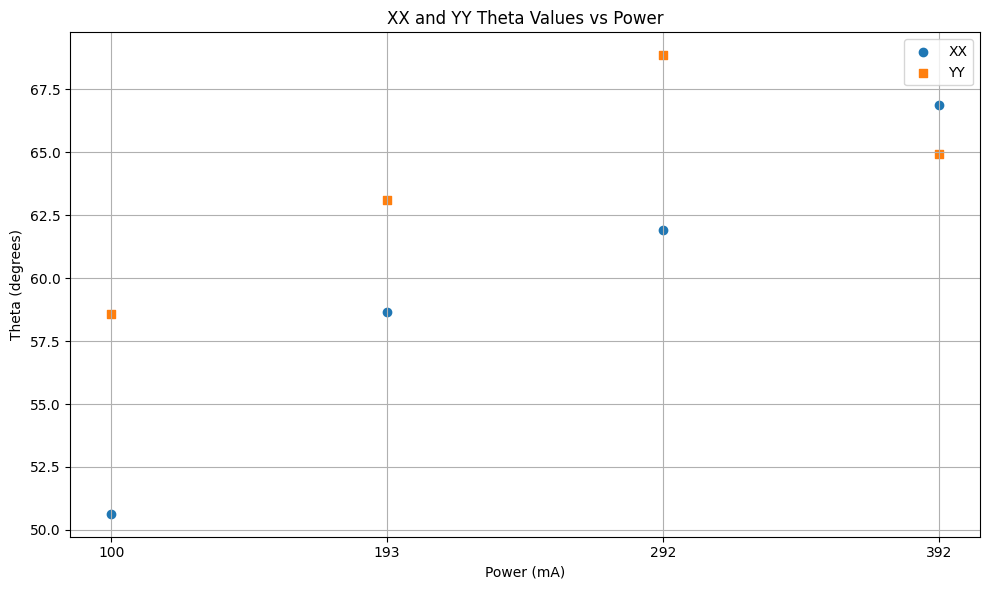

In [29]:
# manual import of data
import pandas as pd
# QPD calib data
scaling_factor = 50/20000  # 50 for downsampling, divide by 20000Hz sample rate
# XX 
xx = {'100': (-0.00202372,	-0.00246727), '193': (-0.00656128,	-0.01077355), '292': (-0.011165,	-0.02091801), '392': (-0.01130522,	-0.02648227)}
xx_series = pd.Series(data=xx) 
yy = {'100': (-0.00109493,	-0.00179321), '193': (-0.004255306,	-0.00838348), '292': (-0.00843359,	-0.0218029), '392': (-0.012513,	-0.0267312)}
yy_series = pd.Series(data=yy)


# Create scatter plots for xx and yy series
plt.figure(figsize=(10,6))

# Extract x and y coordinates from xx series
xx_coords = list(zip(*[v for v in xx.values()]))
# Add labels for each point from xx series
for i, label in enumerate(xx.keys()):
    plt.scatter(xx_coords[0][i]*scaling_factor, xx_coords[1][i]*scaling_factor, label=f'XX {label}mA', color=f'C{i}')

# Extract x and y coordinates from yy series
yy_coords = list(zip(*[v for v in yy.values()]))
# Add labels for each point from yy series
for i, label in enumerate(yy.keys()):
    plt.scatter(yy_coords[0][i]*scaling_factor, yy_coords[1][i]*scaling_factor , label=f'YY {label}mA', color=f'C{i}', marker='s')

plt.xlabel('First coordinate')
plt.ylabel('Second coordinate')
plt.title('QPD Calibration Data')
plt.legend()
plt.grid(True)
plt.show()




# Calculate tan(theta) by dividing second coordinate by first coordinate
# Keys are the power values (100, 193, etc) and values are y/x ratios
xxtantheta = pd.Series({key: coords[1]/coords[0] for key, coords in xx.items()})
yytantheta = pd.Series({key: coords[1]/coords[0] for key, coords in yy.items()})

# Print results to verify
print("XX tan(theta) values by power (mA):")
print(xxtantheta)
print("\nYY tan(theta) values by power (mA):")
print(yytantheta)

# Calculate theta by taking arctangent of the ratios
# Convert to degrees for easier interpretation
xxtheta = pd.Series({key: np.arctan(ratio) * 180/np.pi for key, ratio in xxtantheta.items()})
yytheta = pd.Series({key: np.arctan(ratio) * 180/np.pi for key, ratio in yytantheta.items()})

# Print results to verify
print("\nXX theta values (degrees) by power (mA):")
print(xxtheta)
print("\nYY theta values (degrees) by power (mA):")
print(yytheta)


# Create scatter plot for theta values
plt.figure(figsize=(10,6))

# Plot theta values for XX and YY series
plt.scatter(xxtheta.index, xxtheta.values, label='XX', marker='o')
plt.scatter(yytheta.index, yytheta.values, label='YY', marker='s')

plt.xlabel('Power (mA)')
plt.ylabel('Theta (degrees)')
plt.title('XX and YY Theta Values vs Power')
plt.legend()
plt.grid(True)
plt.show()






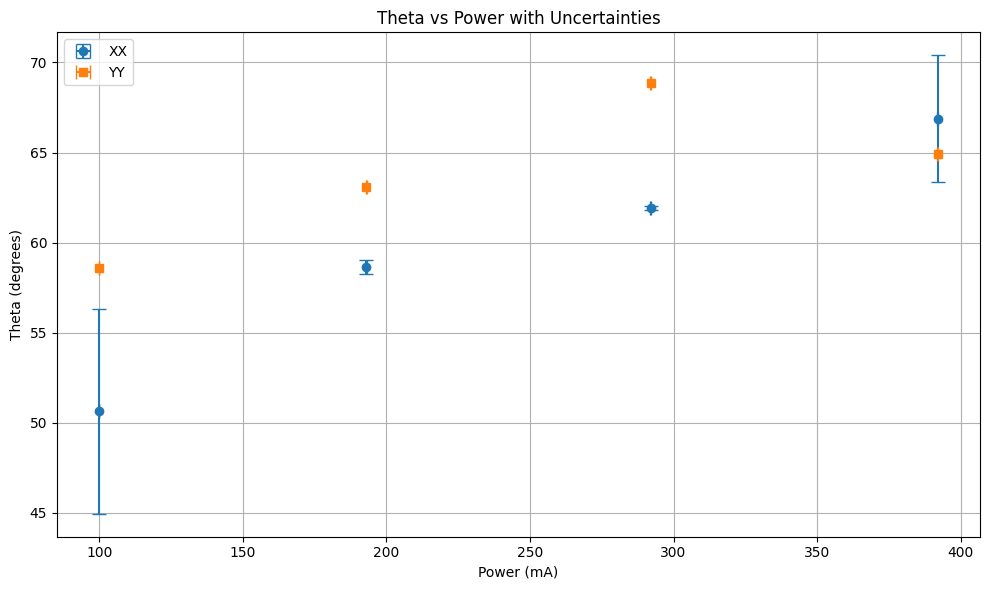


XX Gradient Uncertainties:
Power (mA) | Uncertainty
-----------+------------
      100 | 0.000500
      193 | 0.000160
      292 | 0.000111
      392 | 0.004500


NameError: name 'xx_pconv_errors' is not defined

In [33]:
# Power measurement uncertainty
power_uncertainty = 0.1  # mA

# Create arrays for x-axis error bars (power uncertainty)
xx_power_errors = np.full(len(xxtheta.index), power_uncertainty)
yy_power_errors = np.full(len(yytheta.index), power_uncertainty)

# Define gradient uncertainties for XX measurements
xx_gradient_uncertainties = {
    '100': 0.0005,
    '193': 0.00016,
    '292': 0.000111,
    '392': 0.0045
}

# Calculate theta uncertainties (in radians)
# For arctan(y/x), if y has uncertainty:
# δθ = δy / (x * (1 + (y/x)^2))
def theta_uncertainty_y_only(x, y, dy):
    return abs((dy / (x * (1 + (y/x)**2))) * 180/np.pi)

# Calculate theta uncertainties for XX measurements
xx_dtheta = pd.Series({
    power: theta_uncertainty_y_only(xx[power][0], xx[power][1], gradient_uncert)
    for power, gradient_uncert in xx_gradient_uncertainties.items()
})

# Convert index to numeric for plotting
xxtheta_numeric = xxtheta.copy()
xxtheta_numeric.index = pd.to_numeric(xxtheta_numeric.index)
yytheta_numeric = yytheta.copy()
yytheta_numeric.index = pd.to_numeric(yytheta_numeric.index)

# Create new scatter plot with error bars
plt.figure(figsize=(10,6))

# Plot XX theta values with error bars
plt.errorbar(xxtheta_numeric.index, xxtheta_numeric.values, 
            xerr=xx_power_errors, 
            yerr=xx_dtheta.values,
            fmt='o', label='XX', capsize=5)

# Plot YY theta values with error bars (x-error only)
plt.errorbar(yytheta_numeric.index, yytheta_numeric.values, 
            xerr=yy_power_errors,
            fmt='s', label='YY', capsize=5)

plt.xlabel('Power (mA)')
plt.ylabel('Theta (degrees)')
plt.title('Theta vs Power with Uncertainties')
plt.legend()
plt.grid(True)
plt.show()

# Print the uncertainties table for reference
print("\nXX Gradient Uncertainties:")
print("Power (mA) | Uncertainty")
print("-----------+------------")
for power, uncertainty in xx_gradient_uncertainties.items():
    print(f"{power:>9} | {uncertainty:.6f}")
# Calculate combined uncertainty using error propagation
# If we have two independent sources of uncertainty in y (dy1 and dy2),
# The total uncertainty is sqrt(dy1^2 + dy2^2)
xx_combined_dtheta = pd.Series({
    power: np.sqrt(
        theta_uncertainty_y_only(xx[power][0], xx[power][1], gradient_uncert)**2 + 
        theta_uncertainty_y_only(xx[power][0], xx[power][1], xx_pconv_errors[power])**2
    )
    for power, gradient_uncert in xx_gradient_uncertainties.items()
})

# Create new plot with combined uncertainties
plt.figure(figsize=(10,6))

# Plot XX theta values with combined error bars
plt.errorbar(xxtheta_numeric.index, xxtheta_numeric.values, 
            xerr=xx_power_errors, 
            yerr=xx_combined_dtheta.values,
            fmt='o', label='XX with combined uncertainties', capsize=5)

# Plot YY theta values with error bars (x-error only) 
plt.errorbar(yytheta_numeric.index, yytheta_numeric.values,
            xerr=yy_power_errors,
            fmt='s', label='YY', capsize=5)

plt.xlabel('Power (mA)')
plt.ylabel('Theta (degrees)')
plt.title('Theta vs Power with Combined Uncertainties')
plt.legend()
plt.grid(True)
plt.show()

print("\nXX Combined Uncertainties (degrees):")
print("Power (mA) | Uncertainty")
print("-----------+------------") 
for power, uncertainty in xx_combined_dtheta.items():
    print(f"{power:>9} | {uncertainty:.6f}")
